# Predicting the demand of consumable retail products

## Evaluation Metric:
The evaluation metric is the Root Mean Squared Error (RMSE)

# Import Libraries

In [4]:
# Required Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings # Ignores any warning
warnings.filterwarnings("ignore")

# Read Data

In [5]:
# Reading Train Data using Pandas
Data = pd.read_csv('train.csv')

In [6]:
# Reading Test Data using Pandas
TestData = pd.read_csv('test.csv')

# Data Exploration

In [7]:
Data.head()

,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier
0,Week 1 of 2019,Warehouse Retailers,3,377.1,0,0.0,store_fc6aa,product_cbfad,route_67047,supplier_identifier_055f7
1,Week 1 of 2019,Warehouse Retailers,4,502.8,0,0.0,store_fc6aa,product_2b363,route_67047,supplier_identifier_055f7
2,Week 1 of 2019,Warehouse Retailers,4,589.8,0,0.0,store_fc6aa,product_8de14,route_67047,supplier_identifier_055f7
3,Week 1 of 2019,Warehouse Retailers,4,502.8,0,0.0,store_fc6aa,product_1c00e,route_67047,supplier_identifier_055f7
4,Week 1 of 2019,Warehouse Retailers,3,343.8,0,0.0,store_fc6aa,product_55001,route_67047,supplier_identifier_055f7


In [8]:
Data.tail()

,experiment_week,channel_type,num_units_sold_in_week,sales_revenue_in_week,num_units_returned,returned_units_revenue_loss,store_identifier,product_identifier,category_of_route,supplier_identifier
53364878,Week 5 of 2019,Grocery Stores,2,382.5,0,0.0,store_d7372,product_48541,route_5078b,supplier_identifier_4ae6d
53364879,Week 5 of 2019,Grocery Stores,2,504.0,0,0.0,store_d7372,product_fa4c5,route_5078b,supplier_identifier_4ae6d
53364880,Week 5 of 2019,Grocery Stores,2,270.0,0,0.0,store_d7372,product_3fc7c,route_5078b,supplier_identifier_4ae6d
53364881,Week 5 of 2019,Grocery Stores,2,269.4,0,0.0,store_d7372,product_f7e0e,route_5078b,supplier_identifier_4ae6d
53364882,Week 5 of 2019,Grocery Stores,40,450.0,0,0.0,store_d7372,product_faf61,route_5078b,supplier_identifier_4ae6d


In [9]:
# Checking Dimensions of Data
Data.shape

(53364883, 10)

In [20]:
Data['channel_type']=='Grocery Stores'

0           True
1           True
2           True
3           True
4           True
            ... 
53364878    True
53364879    True
53364880    True
53364881    True
53364882    True
Name: channel_type, Length: 53364883, dtype: bool

In [17]:
print(Data['num_units_sold_in_week']+5)

0            8
1            9
2            9
3            9
4            8
            ..
53364878     7
53364879     7
53364880     7
53364881     7
53364882    45
Name: num_units_sold_in_week, Length: 53364883, dtype: int64


In [7]:
# Checking Data Type of each column
Data.dtypes

experiment_week                 object
channel_type                    object
num_units_sold_in_week           int64
sales_revenue_in_week          float64
num_units_returned               int64
returned_units_revenue_loss    float64
store_identifier                object
product_identifier              object
category_of_route               object
supplier_identifier             object
dtype: object

In [8]:
# To know What columns are present in Data
Data.columns

Index(['experiment_week', 'channel_type', 'num_units_sold_in_week',
       'sales_revenue_in_week', 'num_units_returned',
       'returned_units_revenue_loss', 'store_identifier', 'product_identifier',
       'category_of_route', 'supplier_identifier'],
      dtype='object')

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53364883 entries, 0 to 53364882
Data columns (total 10 columns):
experiment_week                object
channel_type                   object
num_units_sold_in_week         int64
sales_revenue_in_week          float64
num_units_returned             int64
returned_units_revenue_loss    float64
store_identifier               object
product_identifier             object
category_of_route              object
supplier_identifier            object
dtypes: float64(2), int64(2), object(6)
memory usage: 4.0+ GB


# Data Distribution

In [10]:
# To know the Unique levels , count in 'experiment_week'
print(Data['experiment_week'].nunique())
print(Data['experiment_week'].value_counts())

5
Week 1 of 2019    11165207
Week 2 of 2019    11009593
Week 3 of 2019    10615397
Week 5 of 2019    10382849
Week 4 of 2019    10191837
Name: experiment_week, dtype: int64


In [11]:
# To know the Unique levels , Count in 'channel_type'
print(Data['channel_type'].nunique())
print(Data['channel_type'].value_counts())

9
Grocery Stores          48547255
Supermarkets             2697418
Department Stores         682091
Specialty Retailers       603205
Warehouse Retailers       488224
Wholesale Retailers       193696
Convenience Retailer      104175
Discount Retailer          48549
Internet Retailers           270
Name: channel_type, dtype: int64


# Target Attribute Generation

In [12]:
Data['demand_projection'] = Data['num_units_sold_in_week']-Data['num_units_returned']

# Seperate Train and Val Data

In [13]:
# Taking week 5 Data as Validation Data
VAL = Data.loc[Data['experiment_week'] == 'Week 5 of 2019']
VAL.reset_index(drop=True,inplace=True)

In [14]:
# Taking other 4 Weeks Data as Train Data
TRAIN = Data.loc[Data['experiment_week'] != 'Week 5 of 2019']
TRAIN.reset_index(drop=True,inplace=True)

In [15]:
# Checking dimensions of Train and Validation Data
print(VAL.shape)
print(TRAIN.shape)

(10382849, 11)
(42982034, 11)


In [16]:
# Sales revenue = Units sold * Sales price
VAL['SalesPrice'] = VAL['sales_revenue_in_week']/VAL['num_units_sold_in_week']

In [17]:
Sales_Price = VAL['SalesPrice']

In [18]:
Sales_Price = pd.DataFrame(Sales_Price)

In [19]:
VAL.drop(["SalesPrice"],axis=1,inplace=True)

# Duplicates and Missing Values

In [20]:
VAL = VAL.drop_duplicates()
TRAIN = TRAIN.drop_duplicates()

In [21]:
print(VAL.isnull().sum())
print(TRAIN.isnull().sum())

experiment_week                0
channel_type                   0
num_units_sold_in_week         0
sales_revenue_in_week          0
num_units_returned             0
returned_units_revenue_loss    0
store_identifier               0
product_identifier             0
category_of_route              0
supplier_identifier            0
demand_projection              0
dtype: int64
experiment_week                0
channel_type                   0
num_units_sold_in_week         0
sales_revenue_in_week          0
num_units_returned             0
returned_units_revenue_loss    0
store_identifier               0
product_identifier             0
category_of_route              0
supplier_identifier            0
demand_projection              0
dtype: int64


In [22]:
# Reset index after dropping duplicates and NA
VAL.reset_index(drop = True, inplace = True)
TRAIN.reset_index(drop = True, inplace = True)

# Data Type Conversion

In [23]:
categorical =['experiment_week','channel_type','store_identifier', 
              'product_identifier','category_of_route', 'supplier_identifier']

In [24]:
for cat in categorical:
    VAL[cat] = VAL[cat].astype('category')
    TRAIN[cat] = TRAIN[cat].astype('category')

In [25]:
print(VAL.dtypes)
print(TRAIN.dtypes)

experiment_week                category
channel_type                   category
num_units_sold_in_week            int64
sales_revenue_in_week           float64
num_units_returned                int64
returned_units_revenue_loss     float64
store_identifier               category
product_identifier             category
category_of_route              category
supplier_identifier            category
demand_projection                 int64
dtype: object
experiment_week                category
channel_type                   category
num_units_sold_in_week            int64
sales_revenue_in_week           float64
num_units_returned                int64
returned_units_revenue_loss     float64
store_identifier               category
product_identifier             category
category_of_route              category
supplier_identifier            category
demand_projection                 int64
dtype: object


# Co- relation between Numerical Data and Target

In [26]:
corr = TRAIN.corr()

In [27]:
print(corr['demand_projection'].sort_values(ascending=False))

demand_projection              1.000000
num_units_sold_in_week         0.979266
sales_revenue_in_week          0.709149
returned_units_revenue_loss   -0.128008
num_units_returned            -0.151550
Name: demand_projection, dtype: float64


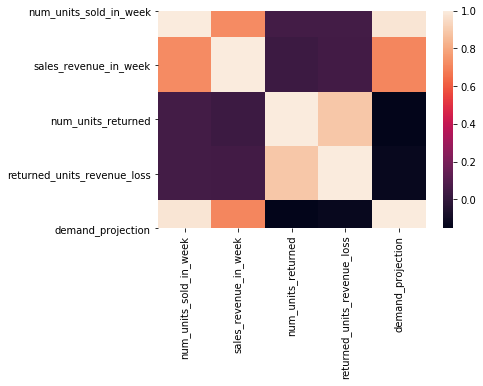

In [28]:
sns.heatmap(corr)

# Visualizations

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

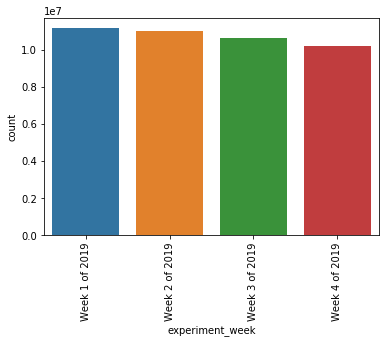

In [29]:
sns.countplot(TRAIN.experiment_week)
plt.xticks(rotation = 90)

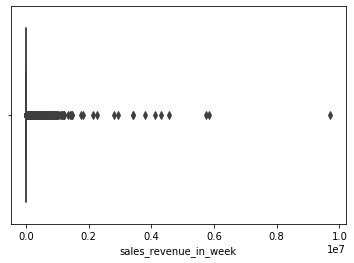

In [30]:
sns.boxplot(TRAIN["sales_revenue_in_week"])

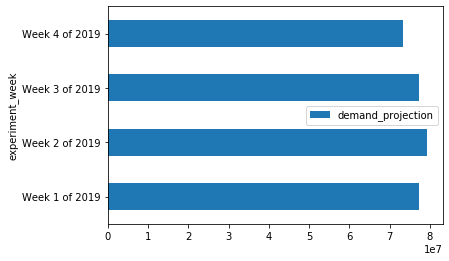

In [31]:
pd.DataFrame(TRAIN.groupby('experiment_week')['demand_projection'].sum()).plot(kind='barh')

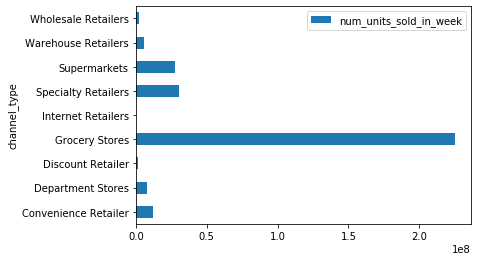

In [32]:
pd.DataFrame(TRAIN.groupby('channel_type')['num_units_sold_in_week'].sum()).plot(kind='barh')

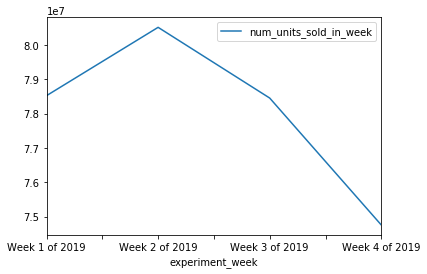

In [33]:
pd.DataFrame(TRAIN.groupby('experiment_week')['num_units_sold_in_week'].sum()).plot(kind='line')

# Binning Categorical Columns

# For Train Data

In [34]:
T1 = TRAIN.groupby("store_identifier")["demand_projection"].sum()
T1=pd.DataFrame(T1)
for i in range(0,11):
    print(T1['demand_projection'].quantile(i/10))

-13164.0
25.0
58.0
100.0
154.0
225.0
322.0
463.0
689.0
1149.0
10110232.0


In [35]:
bins = [-13164.0,25.0,58.0,100.0,154.0,225.0,322.0,463.0,689.0,1149.0,10110232.0]
names =["st1","st2","st3","st4","st5","st6","st7","st8","st9","st10"]
T1["st_id"]=pd.cut(T1["demand_projection"],bins,labels = names )

print(T1.isna().sum())
T1.drop("demand_projection",axis=1,inplace=True)
TRAIN = pd.merge(TRAIN,T1,left_on="store_identifier",right_on="store_identifier",how="left")

demand_projection    0
st_id                1
dtype: int64


In [36]:
T2 = TRAIN.groupby("product_identifier")["demand_projection"].sum()
T2 = pd.DataFrame(T2)
for i in range(0,11):
    print(T2['demand_projection'].quantile(i/10))

-18855.0
8.300000000000011
178.60000000000002
851.0999999999998
2534.400000000001
5786.0
13581.399999999998
32844.39999999999
100801.60000000017
309098.30000000016
13856980.0


In [37]:
bins = [-18855.0,8.300000000000011,178.60000000000002,851.0999999999998,2534.400000000001,5786.0,13581.399999999998,32844.39999999999,100801.60000000017,309098.30000000016,13856980.0]
names =["pid1","pid2","pid3","pid4","pid5","pid6","pid7","pid8","pid9","pid10"]
T2["prd_id"]=pd.cut(T2["demand_projection"],bins,labels = names )

print(T2.isna().sum())
T2.drop("demand_projection",axis=1,inplace=True)
TRAIN = pd.merge(TRAIN,T2,left_on="product_identifier",right_on="product_identifier",how="left")

demand_projection    0
prd_id               1
dtype: int64


In [38]:
T3 = TRAIN.groupby("category_of_route")["demand_projection"].sum()
T3 = pd.DataFrame(T3)
for i in range(0,11):
    print(T3['demand_projection'].quantile(i/10))

-152.0
80.0
244.80000000000018
755.1999999999989
3117.4000000000024
13088.0
27490.99999999998
59626.99999999999
125722.40000000007
280331.00000000006
1516144.0


In [39]:
bins = [-152.0,80.0,244.80000000000018,755.1999999999989,3117.4000000000024,13088.0,27490.99999999998,59626.99999999999,125722.40000000007,280331.00000000006,1516144.0]
names =["cor1","cor2","cor3","cor4","cor5","cor6","cor7","cor8","cor9","cor10"]
T3["cor_id"]=pd.cut(T3["demand_projection"],bins,labels = names )

print(T3.isna().sum())
T3.drop("demand_projection",axis=1,inplace=True)
TRAIN = pd.merge(TRAIN,T3,left_on="category_of_route",right_on="category_of_route",how="left")

demand_projection    0
cor_id               1
dtype: int64


In [40]:
T4 = TRAIN.groupby("supplier_identifier")["demand_projection"].sum()
T4 = pd.DataFrame(T4)
for i in range(0,11):
    print(T4['demand_projection'].quantile(i/10))

16553.0
74848.0
130293.40000000001
195412.49999999997
257656.8
356049.0
504168.39999999985
717251.3
948580.8
1307410.5000000005
3052557.0


In [41]:
bins = [16553.0,74848.0,130293.40000000001,195412.49999999997,257656.8,356049.0,504168.39999999985,717251.3,948580.8,1307410.5000000005,3052557.0]
names =["sid1","sid2","sid3","sid4","sid5","sid6","sid7","sid8","sid9","sid10"]
T4["sup_id"]=pd.cut(T4["demand_projection"],bins,labels = names )

print(T4.isna().sum())
T4.drop("demand_projection",axis=1,inplace=True)
TRAIN = pd.merge(TRAIN,T4,left_on="supplier_identifier",right_on="supplier_identifier",how="left")

demand_projection    0
sup_id               1
dtype: int64


In [42]:
TRAIN.columns

Index(['experiment_week', 'channel_type', 'num_units_sold_in_week',
       'sales_revenue_in_week', 'num_units_returned',
       'returned_units_revenue_loss', 'store_identifier', 'product_identifier',
       'category_of_route', 'supplier_identifier', 'demand_projection',
       'st_id', 'prd_id', 'cor_id', 'sup_id'],
      dtype='object')

In [43]:
TRAIN.drop(["num_units_sold_in_week","sales_revenue_in_week","num_units_returned",
            "returned_units_revenue_loss"],axis=1,inplace=True)

# For Validation Daa

In [44]:
VAL = pd.merge(VAL,T1,left_on="store_identifier",right_on="store_identifier",how="left")
VAL = pd.merge(VAL,T2,left_on="product_identifier",right_on="product_identifier",how="left")
VAL = pd.merge(VAL,T3,left_on="category_of_route",right_on="category_of_route",how="left")
VAL = pd.merge(VAL,T4,left_on="supplier_identifier",right_on="supplier_identifier",how="left")

In [45]:
VAL.drop(["num_units_sold_in_week","sales_revenue_in_week","num_units_returned",
          "returned_units_revenue_loss"],axis=1,inplace=True)

# Checking for Null Values after Binning

In [46]:
TRAIN.isnull().sum()

experiment_week           0
channel_type              0
store_identifier          0
product_identifier        0
category_of_route         0
supplier_identifier       0
demand_projection         0
st_id                    60
prd_id                   30
cor_id                    9
sup_id                 2106
dtype: int64

In [47]:
VAL.isnull().sum()

experiment_week            0
channel_type               0
store_identifier           0
product_identifier         0
category_of_route          0
supplier_identifier        0
demand_projection          0
st_id                  24036
prd_id                 89508
cor_id                   162
sup_id                   639
dtype: int64

In [48]:
# !pip install sklearn_pandas

In [49]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()
TRAIN['st_id']=imputer.fit_transform(TRAIN['st_id'])
TRAIN['prd_id']=imputer.fit_transform(TRAIN['prd_id'])
TRAIN['cor_id']=imputer.fit_transform(TRAIN['cor_id'])
TRAIN['sup_id']=imputer.fit_transform(TRAIN['sup_id'])

In [50]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()
VAL['st_id']=imputer.fit_transform(VAL['st_id'])
VAL['prd_id']=imputer.fit_transform(VAL['prd_id'])
VAL['cor_id']=imputer.fit_transform(VAL['cor_id'])
VAL['sup_id']=imputer.fit_transform(VAL['sup_id'])

In [51]:
TRAIN.isnull().sum()

experiment_week        0
channel_type           0
store_identifier       0
product_identifier     0
category_of_route      0
supplier_identifier    0
demand_projection      0
st_id                  0
prd_id                 0
cor_id                 0
sup_id                 0
dtype: int64

In [52]:
VAL.isnull().sum()

experiment_week        0
channel_type           0
store_identifier       0
product_identifier     0
category_of_route      0
supplier_identifier    0
demand_projection      0
st_id                  0
prd_id                 0
cor_id                 0
sup_id                 0
dtype: int64

In [53]:
TRAIN.drop(["store_identifier","product_identifier","category_of_route","supplier_identifier"],axis=1,inplace=True)
VAL.drop(["store_identifier","product_identifier","category_of_route","supplier_identifier"],axis=1,inplace=True)

# Seperate Target Variable

In [54]:
TRAIN.head()

,experiment_week,channel_type,demand_projection,st_id,prd_id,cor_id,sup_id
0,Week 1 of 2019,Warehouse Retailers,3,st8,pid10,cor10,sid6
1,Week 1 of 2019,Warehouse Retailers,4,st8,pid10,cor10,sid6
2,Week 1 of 2019,Warehouse Retailers,4,st8,pid10,cor10,sid6
3,Week 1 of 2019,Warehouse Retailers,4,st8,pid10,cor10,sid6
4,Week 1 of 2019,Warehouse Retailers,3,st8,pid10,cor10,sid6


In [55]:
VAL.head()

,experiment_week,channel_type,demand_projection,st_id,prd_id,cor_id,sup_id
0,Week 5 of 2019,Warehouse Retailers,2,st8,pid10,cor10,sid6
1,Week 5 of 2019,Warehouse Retailers,2,st8,pid10,cor10,sid6
2,Week 5 of 2019,Warehouse Retailers,8,st8,pid10,cor10,sid6
3,Week 5 of 2019,Warehouse Retailers,2,st8,pid10,cor10,sid6
4,Week 5 of 2019,Warehouse Retailers,14,st8,pid10,cor10,sid6


In [56]:
Y_Train=TRAIN["demand_projection"]
X_Train=TRAIN.drop(["experiment_week","demand_projection"],axis=1)

In [57]:
Y_Val=VAL["demand_projection"]
X_Val=VAL.drop(["experiment_week","demand_projection"],axis=1)

In [58]:
X_Train = pd.get_dummies(data=X_Train,drop_first=True)

X_Val = pd.get_dummies(data=X_Val,drop_first=True)

In [59]:
print(X_Train.shape)
print(X_Val.shape)

print(Y_Train.shape)
print(Y_Val.shape)

(42981909, 44)
(10382826, 44)
(42981909,)
(10382826,)


# Columns Mismatch

In [60]:
# missing_cols = set( X_Train.columns ) - set( X_Val.columns )

In [61]:
# for c in missing_cols:
 #   X_Val[c] = 0

In [62]:
# X_Val = X_Val[X_Train.columns]

In [63]:
# X_Val.shape

In [64]:
# X_Train.shape

# Test Data Pre

In [65]:
TestData.head()

,id,experiment_week,channel_type,supplier_identifier,category_of_route,store_identifier,product_identifier
0,1,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_cbfad
1,2,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_2b363
2,3,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_f79b8
3,4,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_8de14
4,5,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_1c00e


In [66]:
TestData = pd.merge(TestData,T1,left_on="store_identifier",right_on="store_identifier",how="left")
TestData = pd.merge(TestData,T2,left_on="product_identifier",right_on="product_identifier",how="left")
TestData = pd.merge(TestData,T3,left_on="category_of_route",right_on="category_of_route",how="left")
TestData = pd.merge(TestData,T4,left_on="supplier_identifier",right_on="supplier_identifier",how="left")

In [67]:
Test_Id = TestData["id"]

In [68]:
TestData.head()

,id,experiment_week,channel_type,supplier_identifier,category_of_route,store_identifier,product_identifier,st_id,prd_id,cor_id,sup_id
0,1,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_cbfad,st8,pid10,cor10,sid6
1,2,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_2b363,st8,pid10,cor10,sid6
2,3,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_f79b8,st8,pid10,cor10,sid6
3,4,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_8de14,st8,pid10,cor10,sid6
4,5,Week 6 of 2019,Warehouse Retailers,supplier_identifier_055f7,route_67047,store_fc6aa,product_1c00e,st8,pid10,cor10,sid6


In [69]:
TestData.drop(["id","experiment_week","supplier_identifier","category_of_route",
            "store_identifier","product_identifier"],axis=1,inplace=True)

In [70]:
TestData.head()

,channel_type,st_id,prd_id,cor_id,sup_id
0,Warehouse Retailers,st8,pid10,cor10,sid6
1,Warehouse Retailers,st8,pid10,cor10,sid6
2,Warehouse Retailers,st8,pid10,cor10,sid6
3,Warehouse Retailers,st8,pid10,cor10,sid6
4,Warehouse Retailers,st8,pid10,cor10,sid6


In [71]:
TestData_dummy = pd.get_dummies(data=TestData,drop_first=True)

In [72]:
TestData_dummy.shape

(20815581, 44)

# Model Building

# 1. Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators =10, n_jobs =-1, max_depth = 4)
RF_model.fit(X_Train, Y_Train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [74]:
Y_Pred_rf = RF_model.predict(X_Val)

In [75]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RF = sqrt(mean_squared_error(Y_Val, Y_Pred_rf))
RF

20.300111431410553

In [76]:
Y_Pred_rfT = RF_model.predict(X_Train)

In [77]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RFT = sqrt(mean_squared_error(Y_Train, Y_Pred_rfT))
RFT

20.446733721710554

# Test Random Forest

In [78]:
Y_PredT_rf = RF_model.predict(TestData_dummy)

In [79]:
Y_PredT_rf

array([7.35052493, 7.35052493, 7.35052493, ..., 4.29011979, 4.29011979,
       4.29011979])

In [80]:
import numpy

In [81]:
Y_PredT_rf=numpy.round(Y_PredT_rf,3)

In [82]:
predT = pd.Series(Y_PredT_rf)
csv = pd.DataFrame({'id': Test_Id, 'demand_projection': predT})
csv.to_csv('Test_RF.csv', index = False,header = True)

# Decision Tree

In [83]:
#Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 15)
reg.fit(X_Train, Y_Train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [84]:
Y_Pred_Reg = reg.predict(X_Val)
Y_Pred_Reg

array([8.48942172, 8.48942172, 8.48942172, ..., 4.56511808, 4.56511808,
       4.56511808])

In [85]:
from math import sqrt
from sklearn.metrics import mean_squared_error
DT = sqrt(mean_squared_error(Y_Val, Y_Pred_Reg))
print(DT)

19.36516947345306


In [86]:
Y_Pred_RegT = reg.predict(X_Train)

In [87]:
DT_T = sqrt(mean_squared_error(Y_Train, Y_Pred_RegT))

print(DT_T)

19.446603436329497


# Test Decision Tree 

In [88]:
Y_PredT_Reg = reg.predict(TestData_dummy)

In [89]:
Y_PredT_Reg

array([14.48970888, 14.48970888, 14.48970888, ...,  3.03918919,
        3.22420217,  2.09256072])

In [90]:
import numpy 

In [91]:
Y_PredT_Reg=numpy.round(Y_PredT_Reg,3)

In [92]:
Y_PredT_Reg

array([14.49 , 14.49 , 14.49 , ...,  3.039,  3.224,  2.093])

In [93]:
Y_PredT_Reg.shape

(20815581,)

In [94]:
predT = pd.Series(Y_PredT_Reg)
csv = pd.DataFrame({'id': Test_Id, 'demand_projection': predT})
csv.to_csv('Test_DT.csv', index = False,header = True)

# Loss of Revenue

In [138]:
Y_Val=pd.DataFrame(Y_Val)

In [139]:
Y_Val.columns

Index(['demand_projection'], dtype='object')

In [140]:
Actual_Demand=Y_Val['demand_projection']
Actual_Demand=pd.DataFrame(Actual_Demand)

In [141]:
Actual_Demand.head()

,demand_projection
0,2
1,2
2,8
3,2
4,14


In [142]:
Actual_Demand.shape

(10382826, 1)

In [143]:
Y_Pred_Reg = pd.DataFrame(Y_Pred_Reg)

In [144]:
Y_Pred_Reg['demand_projection'] = Y_Pred_Reg

In [145]:
Y_Pred_Reg.head()

,0,demand_projection
0,8.489422,8.489422
1,8.489422,8.489422
2,8.489422,8.489422
3,8.489422,8.489422
4,8.489422,8.489422


In [146]:
Loss_of_Revenue=Actual_Demand["demand_projection"]-Y_Pred_Reg["demand_projection"]

In [147]:
Loss_of_Revenue.shape

(10382826,)

In [148]:
type(Loss_of_Revenue)

pandas.core.series.Series

In [149]:
Loss_of_Revenue = pd.DataFrame(Loss_of_Revenue)

In [150]:
type(Loss_of_Revenue)

pandas.core.frame.DataFrame

In [151]:
Demand_RL = Loss_of_Revenue["demand_projection"] * Sales_Price["SalesPrice"]

In [152]:
type(Demand_RL)

pandas.core.series.Series

In [153]:
Demand_RL.sum()

245101835.18225732